# Telecommunication Customer Churn

In [1]:
import numpy as np


ModuleNotFoundError: No module named 'numpy'

In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
import os

# List all files, including hidden ones
os.listdir('.')



['logistic.ipynb',
 'project_2.ipynb',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'x_final_test.csv',
 'x_train.csv',
 'x_val.csv',
 'y_final_test.csv',
 'y_train.csv',
 'y_val.csv']

## Data Pre-processing

In [15]:
telco_customer_churn = pd.read_csv('Wa_Fn-UseC_-Telco-Customer-Churn.csv')
#to view the dataset

In [16]:
telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check the Null/Missing Values

In [ ]:
telco_customer_churn.info()
# to get the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_customer_churn.isnull().sum()
# to count the total number of missing values in each column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

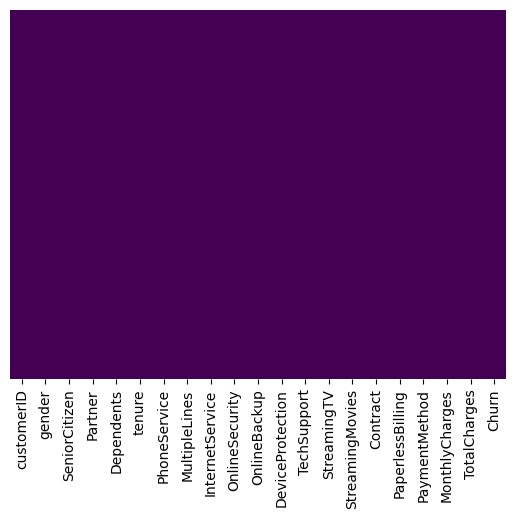

In [ ]:
# For checking missing values(it is indicated yellow color)
sns.heatmap(telco_customer_churn.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Plotting Bar Graphs

<Axes: xlabel='Churn', ylabel='count'>

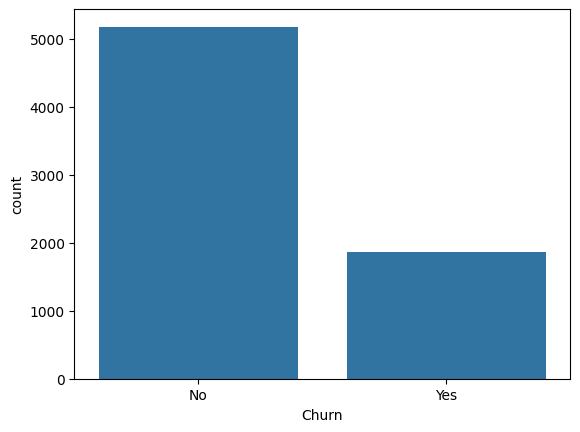

In [ ]:
# to check the count of Churn
sns.countplot(x='Churn',data=telco_customer_churn)

<Axes: xlabel='Churn', ylabel='count'>

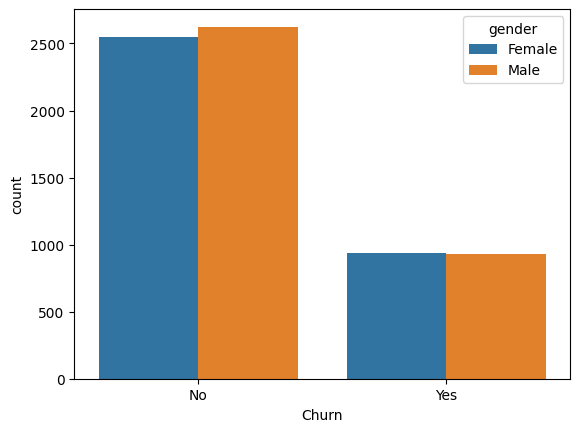

In [ ]:
sns.countplot(x='Churn',hue='gender', data=telco_customer_churn)
# to visualize the distribution of customer churn based on gender

<Axes: xlabel='Churn', ylabel='count'>

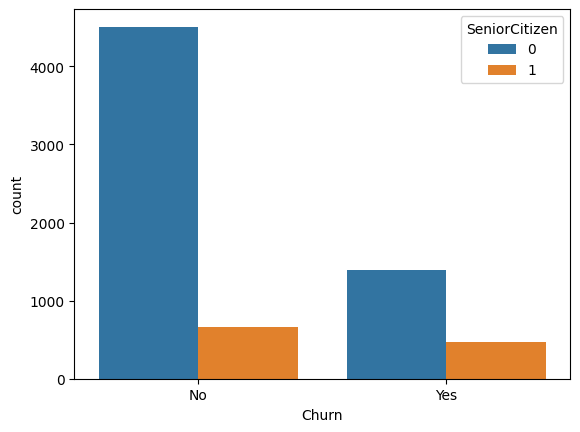

In [ ]:
sns.countplot(x='Churn',hue='SeniorCitizen', data=telco_customer_churn)
# to visualize the distribution of customer churn based on senior citizen status

<Axes: xlabel='Churn', ylabel='count'>

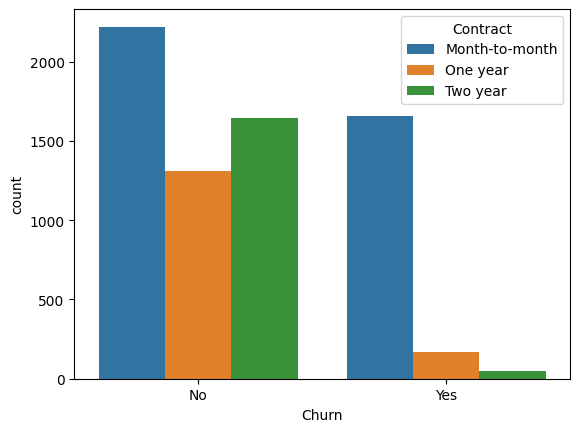

In [ ]:
sns.countplot(x='Churn',hue='Contract', data=telco_customer_churn)
# to visualize the distribution of customer churn based on contract type

In [ ]:
telco_customer_churn.head()
# to display the first 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Detecting Outliers 



In [ ]:
# Set the style of seaborn plots to "whitegrid" for a cleaner appearance
sns.set(style="whitegrid")

In [31]:
# Convert TotalCharges to numeric (it might have non-numeric values like spaces)
telco_customer_churn['TotalCharges'] = pd.to_numeric(telco_customer_churn['TotalCharges'], errors='coerce')




In [32]:
numeric_columns = telco_customer_churn.select_dtypes(include=['float64']).columns
# Visualize each numeric column

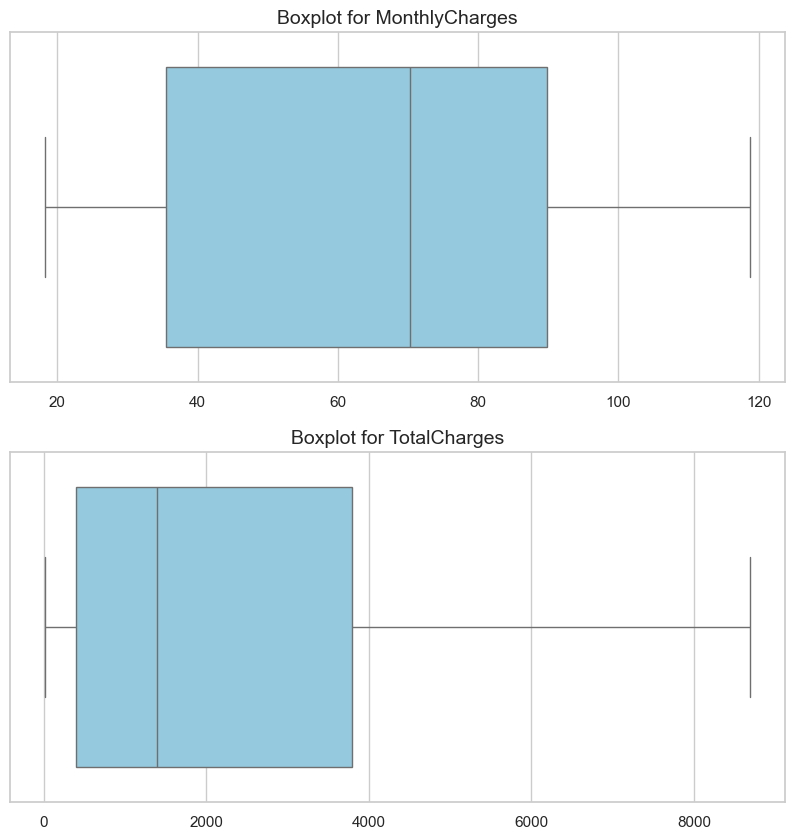

In [ ]:
# Create subplots
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 5 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    
    # Plot boxplot for the column
    sns.boxplot(
        data=telco_customer_churn,
        x=column,
        ax=axes[i] if len(numeric_columns) > 1 else axes,
        color='skyblue'
    )
    
    # Set title for the plot
    axes[i].set_title(f'Boxplot for {column}', fontsize=14)
    axes[i].set_xlabel('')  # Clear x-label for cleaner visuals


### Feature Engineering
(Combine or create new features based on existing ones)

In [27]:
telco_customer_churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


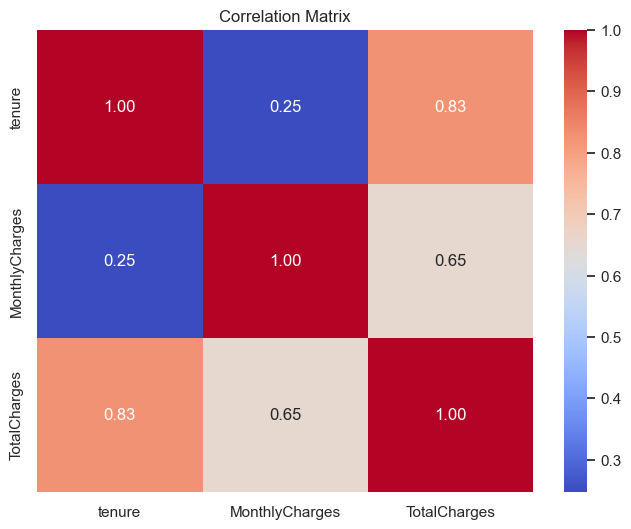

In [ ]:
# Correlation matrix for numeric columns
correlation_matrix = telco_customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()


# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Handling Categorical Variables

In [ ]:
# to map Yes to 1 and No to 0
yes_no_mapping = {'Yes': 1, 'No': 0}
telco_customer_churn['Partner'] = telco_customer_churn['Partner'].map(yes_no_mapping)   
telco_customer_churn['Dependents'] = telco_customer_churn['Dependents'].map(yes_no_mapping)
telco_customer_churn['PhoneService'] = telco_customer_churn['PhoneService'].map(yes_no_mapping)
telco_customer_churn['PaperlessBilling'] = telco_customer_churn['PaperlessBilling'].map(yes_no_mapping)
 

In [ ]:
# to map DSL, Fiber optic and No
internet_service_mapping = {'DSL': 1, 'Fiber optic': 1, 'No': 0}
telco_customer_churn['InternetService'] = telco_customer_churn['InternetService'].map(internet_service_mapping)

In [ ]:
# to map Yes, No and No internet service
online_security_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}
telco_customer_churn['OnlineSecurity'] = telco_customer_churn['OnlineSecurity'].map(online_security_mapping)

telco_customer_churn['DeviceProtection'] = telco_customer_churn['DeviceProtection'].map(online_security_mapping)
telco_customer_churn['TechSupport'] = telco_customer_churn['TechSupport'].map(online_security_mapping)
telco_customer_churn['StreamingTV'] = telco_customer_churn['StreamingTV'].map(online_security_mapping)
telco_customer_churn['StreamingMovies'] = telco_customer_churn['StreamingMovies'].map(online_security_mapping)


In [ ]:
# to map Yes, No and No phone service
multiple_lines_mapping = {'Yes': 1, 'No': 0, 'No phone service': 0}
telco_customer_churn['MultipleLines'] = telco_customer_churn['MultipleLines'].map(multiple_lines_mapping)

In [ ]:
# to map Month-to-month, One year and Two year
contract_mapping = {'Month-to-month': 'MM', 'One year': 'OY', 'Two year': 'TY'}
telco_customer_churn['Contract'] = telco_customer_churn['Contract'].map(contract_mapping)

In [ ]:
# to map payment method
payment_mapping = {'Electronic check': 'Check', 'Mailed check': 'Check', 'Bank transfer (automatic)': 'Bank', 'Credit card (automatic)': 'Card'}
telco_customer_churn['PaymentMethod'] = telco_customer_churn['PaymentMethod'].map(payment_mapping)

In [43]:
telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.50,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,Yes


In [44]:
telco_customer_churn['Churn'] = telco_customer_churn['Churn'].map({'Yes': 1, 'No': 0})

## Dummy Variables

This drops the first category (e.g., "Male" or "Female") to avoid multicollinearity in models like regression
 it will create only one dummy variable for "Male" or "Female".

In [ ]:
pd.get_dummies(telco_customer_churn['gender'], drop_first= True).astype(int)
# to get dummies

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [ ]:
# Convert the 'gender' column into dummy variables (one-hot encoding) and drop the first category
sex = pd.get_dummies(telco_customer_churn['gender'], drop_first= True).astype(int)

In [ ]:
# Convert the 'Contract' column into dummy variables and drop the first category
contract = pd.get_dummies(telco_customer_churn['Contract'], drop_first= True).astype(int)

In [ ]:
# Display the dummy variables for the 'Contract' column
contract

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [49]:
paymethode = pd.get_dummies(telco_customer_churn['PaymentMethod'], drop_first= True).astype(int)

In [ ]:
# Display the dummy variables for the 'PaymentMethod' column
paymethode

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1
...,...,...
7038,0,1
7039,1,0
7040,0,1
7041,0,1


In [51]:
telco_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1


### Concatenate the dummy variables to the table

In [52]:

telco_customer_churn = pd.concat([telco_customer_churn, sex, contract, paymethode], axis=1)

In [ ]:
# dropping columns that are not required
telco_customer_churn.drop(['customerID', 'gender', 'Contract', 'PaymentMethod'], axis=1, inplace=True)


In [ ]:
# Drop the 'calculated_TotalCharges' column
telco_customer_churn.drop(['calculated_TotalCharges'], axis=1, inplace=True)

In [55]:
telco_customer_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,Yes,0,...,0,1,29.85,29.85,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,No,1,...,0,0,56.95,1889.50,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,Yes,0,...,0,1,53.85,108.15,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,No,1,...,0,0,42.30,1840.75,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,No,0,...,0,1,70.70,151.65,1,0,0,0,0,1


In [ ]:
# Map the 'OnlineBackup' column values based on 'online_security_mapping'
telco_customer_churn['OnlineBackup'] = telco_customer_churn['OnlineBackup'].map(online_security_mapping)

In [ ]:
# Select the columns with categorical data types 'object' and 'category'
categorical_columns = telco_customer_churn.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Display the list of categorical columns
categorical_columns 

Index([], dtype='object')

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply Min-Max Scaling to 'tenure' and 'MonthlyCharges'
# telco_customer_churn[['tenure', 'MonthlyCharges']] = scaler.fit_transform(telco_customer_churn[['tenure', 'MonthlyCharges']])

# # Display the first few rows to check the scaling
# print(telco_customer_churn[['tenure', 'MonthlyCharges']].head())



     tenure  MonthlyCharges
0  0.013889        0.115423
1  0.472222        0.385075
2  0.027778        0.354229
3  0.625000        0.239303
4  0.027778        0.521891


In [ ]:
telco_customer_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,...,0,1,29.85,29.85,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,...,0,0,56.95,1889.50,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,...,0,1,53.85,108.15,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,...,0,0,42.30,1840.75,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,70.70,151.65,1,0,0,0,0,1


In [ ]:
# Count the total number of missing values in each column
telco_customer_churn.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
Male                 0
OY                   0
TY                   0
Card                 0
Check                0
dtype: int64

### Replace missing values with the mean

In [ ]:
# to handle missing values in the dataset
from sklearn.impute import SimpleImputer

# Replace missing values with the mean
imputer = SimpleImputer(strategy='mean')
telco_customer_churn['TotalCharges'] = imputer.fit_transform(telco_customer_churn[['TotalCharges']])

# Check for missing values again
print(telco_customer_churn.isnull().sum())


SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
Male                0
OY                  0
TY                  0
Card                0
Check               0
dtype: int64


### Correlation Matrix

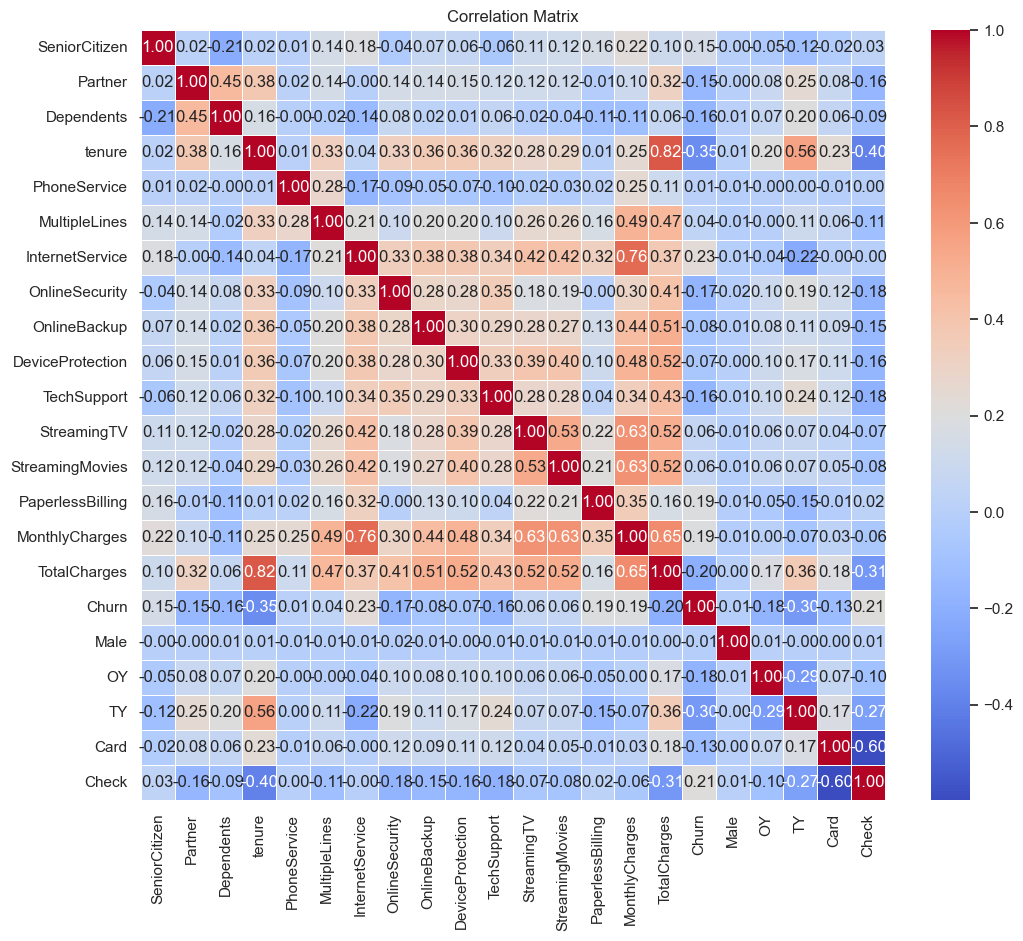

In [ ]:
# Calculate the correlation matrix for all numeric columns
correlation_matrix = telco_customer_churn.corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Separate the features (x) and the target variable (y)
x = telco_customer_churn.drop('Churn', axis=1)
y = telco_customer_churn['Churn']

## Split Dataset

In [ ]:
# to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets (30% of the data for testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
# Displays the number of rows and columns in the training features dataset.
print( x_train.shape, '-----> Training Features Shape')
print( x_test.shape, '-----> Testing Features Shape')
print( y_train.shape, '-----> Training Labels Shape')
print( y_test.shape, '-----> Testing Labels Shape')
# Displays the number of labels (rows) in the testing dataset.

(4930, 21) -----> Training Features Shape
(2113, 21) -----> Testing Features Shape
(4930,) -----> Training Labels Shape
(2113,) -----> Testing Labels Shape


In [ ]:
# Print the total number of rows (combining both training and testing sets)
print('test + train_all: ',len(telco_customer_churn))

test + train_all:  7043


### Feature Scaling 

In [ ]:
# to standardize the features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the validation data using the same scaler
x_text_scaled = scaler.transform(x_test)

# Print shapes to confirm
print(x_train_scaled.shape, '-----> Scaled Training Features Shape')
print(x_text_scaled.shape, '-----> Scaled Validation Features Shape')

(4930, 21) -----> Scaled Training Features Shape
(2113, 21) -----> Scaled Validation Features Shape


In [ ]:
# import pandas as pd

# # Convert scaled training data to a DataFrame
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# x_val_scaled_df = pd.DataFrame(x_val_scaled, columns=x_train.columns)

# # Fit the model using the DataFrame
# #churn_log_model = LogisticRegression(max_iter=200)



In [ ]:
# Print the number of missing values in the scaled training and testing datasets
print(np.isnan(x_train_scaled).sum(), "missing values in x_train_scaled")
print(np.isnan(x_text_scaled).sum(), "missing values in x_val_scaled")

0 missing values in x_train_scaled
0 missing values in x_val_scaled


In [ ]:
# to apply logistic regression for classification
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression model with a maximum of 200 iterations for convergence
churn_log_model = LogisticRegression(max_iter=200)

### Apply Cross Validation

In [ ]:
# to perform cross-validation
from sklearn.model_selection import cross_val_score

# cross-validation on the logistic regression model using the scaled training data
scores = cross_val_score(churn_log_model, x_train_scaled, y_train, cv=5)

In [ ]:
# Display the cross-validation scores
scores

array([0.80223124, 0.80730223, 0.79817444, 0.80831643, 0.80527383])

In [ ]:
# Print the average accuracy and the standard deviation of the cross-validation scores
print("average accuracy: ", np.mean(scores))
print("std: ", np.std(scores))

average accuracy:  0.8042596348884381
std:  0.003684767165230211


In [ ]:
churn_log_model.fit(x_train, y_train)
#Trains the model using the features (x_train) and labels (y_train) from the training dataset.

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
# Print the accuracy of the logistic regression model on the scaled training and testing datasets
print("train_accuracy: ", churn_log_model.score(x_train_scaled, y_train))
print("test_accuracy: ", churn_log_model.score(x_text_scaled, y_test))

train_accuracy:  0.7158215010141988
test_accuracy:  0.6781826786559394


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Make predictions on the testing dataset using the trained logistic regression model
churn_predictions = churn_log_model.predict(x_test)

In [ ]:
# Display the predicted values for the 'Churn' variable
churn_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# to evaluate the performance of the model
from sklearn.metrics import classification_report

In [ ]:
# Print the classification report
print(classification_report(y_test, churn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1569
           1       0.61      0.52      0.57       544

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [ ]:
# to access various evaluation metrics
import sklearn.metrics as  sm

In [ ]:
# Calculate the accuracy of the churn prediction model on the test dataset
accuracy_of_churn_model = sm.accuracy_score(y_test, churn_predictions)
print('Accuracy Score ===> ', str(accuracy_of_churn_model))

Accuracy Score ===>  0.7927117841930904


In [ ]:
# to evaluate the model's performance by checking true vs predicted values
from sklearn.metrics import confusion_matrix

In [ ]:
# to set the default style for plots
import seaborn as sns; sns.set()

In [ ]:
# to create visualizations
import matplotlib.pyplot as plt

In [ ]:
# to display matplotlib plots within the notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# Compute the confusion matrix
mat = confusion_matrix(y_test, churn_predictions)

Text(110.44999999999997, 0.5, 'predicted label')

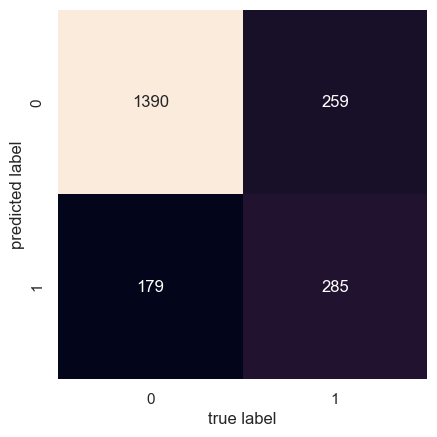

In [ ]:
# Create a heatmap of the transposed confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Linear Regression 

In [ ]:
# to perform linear regression analysis
from sklearn.linear_model import LinearRegression

# Initialize a LinearRegression model instance
Regression_model = LinearRegression()

In [ ]:
# Train the linear regression model using the scaled training data
Regression_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# R2 score of the model on the training data
Regression_model.score(x_train_scaled, y_train)

0.29590924527085505

In [ ]:
# R2 score of the model on the test data
Regression_model.score(x_text_scaled, y_test)

0.24026645528797674

In [ ]:
# to evaluate regression model performance
from sklearn.metrics import r2_score,mean_squared_error

# Predictions on the datasets using the trained linear regression model
y_valtrain_preds = Regression_model.predict(x_train_scaled)
y_test_preds = Regression_model.predict(x_test)

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [138]:
# R2 Error
print("R2 Error (Train set): ", r2_score(y_train, y_valtrain_preds))
print("R2 Error (Test set): ", r2_score(y_test, y_test_preds))

R2 Error (Train set):  0.29590924527085505
R2 Error (Test set):  -748445.0594622387


In [140]:
# Mean Squred Error
print("Mean Squred Error (Train set): ", mean_squared_error(y_train, y_valtrain_preds))
print("Mean Squred Error (Test set): ", mean_squared_error(y_test, y_test_preds))

Mean Squred Error (Train set):  0.13837446363935263
Mean Squred Error (Test set):  0.14523930147770725


In [ ]:
# to perform cross-validation
from sklearn.model_selection import cross_val_score

# cross-validation on the regression model and R2 score for each fold
scores = cross_val_score(Regression_model, x_train_scaled, y_train,scoring="r2", cv=10)

In [ ]:
# Train the linear regression model using the scaled training data
Regression_model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# R2 score of the model on the training data
Regression_model.score(x_train_scaled, y_train)

0.29590924527085505

In [ ]:
# R2 scores from the cross-validation
scores

array([0.2196598 , 0.32135622, 0.27941471, 0.31297095, 0.23475615,
       0.29604123, 0.29301589, 0.30200057, 0.32152353, 0.26919397])

### Hyperparameter Optimization

#### Logistic Regression 

In [ ]:
# Define the parameter
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # L2 regularization
    'solver': ['liblinear', 'saga']  # Solvers
}  

# to apply logistic regression for classification
from sklearn.linear_model import LogisticRegression

# ogisticRegression model with a maximum of 100 iterations
lr = LogisticRegression(max_iter=100)

In [ ]:
# to perform hyperparameter tuning through cross-validation
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV with the logistic regression model
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
# Fit the grid search
grid_search_lr.fit(x_train_scaled, y_train)

# Print the best parameters and score
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_search_lr.best_score_)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validation Accuracy for Logistic Regression: 0.8046653144016227


C - inverse of the regularization strength (10: low)

penalty - type of regularization (l2: Ridge Regularization)

solver - optimization algorithm used to fit (saga: for large datasets)

In [ ]:
# LogisticRegression model with specified hyperparameters
best_model = LogisticRegression(C=10, penalty='l2', solver='saga', max_iter=10000)
best_model.fit(x_train_scaled, y_train)

# Evaluate on test set
test_accuracy = best_model.score(x_text_scaled, y_test)
print("Test Set Accuracy:", test_accuracy)

Test Set Accuracy: 0.7917652626597255


In [ ]:
# to generate a detailed report
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_test_preds = best_model.predict(x_text_scaled)


# Classification Report
print("Classification Report:\n", classification_report(y_test, y_test_preds))


Confusion Matrix:
 [[1391  178]
 [ 262  282]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1569
           1       0.61      0.52      0.56       544

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.79      2113



## Evaluation

### Linear regression metrics:

Train MSE: 0.1384 

Test MSE: 0.1452 

Train R2: 0.2959 

Test R2: -748445.059 
 
### Logistic regression metrics:

Accuracy: 79%

F1-Score (Class 0 Vs 1):

Class 0 (Non-Churn): High precision and recall (~0.86 F1-score).

Class 1 (Churn): Precision and recall are lower, leading to an F1-score of 0.57.


## Conclusion

Based on the evaluation of the models, the results reveal the following insights.

### Linear Regression:
The model scored an extremely low R2 score (-748445.0594). Therefore, this model fails to capture the variability of the target variable.

The Mean Squared Error (MSE) values for the train and test sets are 0.1384 and 0.1452. Those values are close, but they do not provide a good generalization due to the negative R2 score.

The dataset likely contains non-linear relationships or patterns that Linear Regression is unable to model effectively.

### Logistic Regression:
The model achieved an overall accuracy of 79%, showing a good performance.

The confusion matrix shows that the model is highly effective at predicting non-churners (Class 0) but it shows a lower precision (61%) and recall (52%) for Class 1.

The weighted F1-Score of 79% demonstrates that the model generalizes well across both classes.

### Final overview:
Logistic Regression is a better fit, with an acceptable performance for the dataset.

The poor performance of Linear Regression confirms that the dataset and its target variable are not suitable for the dataset.